# P3 - Group 2

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Meter A
Contains 87 instances of physical diagnostic parameters for an 8-path liquid USM. It
has 37 attributes(features) and 2 classes or health states: \
(1) -- Flatness ratio \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(11) -- Flow velocity in each of the eight paths \
(12)-(19) -- Speed of sound in each of the eight paths \
(20) -- Average speed of sound in all eight paths \
(21)-(36) -- Gain at both ends of each of the eight paths \
(37) -- Class attribute or health state of meter: 1,2 \
Class '1' - Healthy \
Class '2' - Installation effects 

In [83]:

meter_a_df = pd.read_csv("./dataset/Meter A", sep="\t", header=None)
meter_a_df.columns = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Class Attribute/Health State']
# replace
meter_a_df


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Class Attribute/Health State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
5,0.838901,1.014557,0.995404,5.646000,6.830224,6.660216,5.630102,5.712871,6.813999,6.693988,5.660037,1484.340500,1484.315500,1484.296000,1484.186000,1484.291333,1484.317333,1483.795167,1484.350000,1484.236479,34.008788,33.422848,36.684572,36.941732,35.278320,35.444338,33.748372,32.495117,34.103192,33.168945,36.666668,36.827800,35.997722,35.958658,34.488932,32.849935,1
6,0.841544,1.010260,0.995604,5.618586,6.812160,6.685219,5.672933,5.728375,6.811300,6.672610,5.686053,1484.645500,1484.617833,1484.599667,1484.485333,1484.590833,1484.617667,1484.094000,1484.648167,1484.537375,34.060872,33.411458,36.674807,36.941730,35.278320,35.450845,33.723958,32.501627,34.103190,33.185222,36.668295,36.829428,35.999352,35.947267,34.480795,32.861327,1
7,0.840916,1.015113,0.995890,5.647400,6.812408,6.675509,5.623755,5.740677,6.795750,6.670478,5.654347,1484.815667,1484.791667,1484.774000,1484.662167,1484.763333,1484.790167,1484.266000,1484.821167,1484.710521,34.028320,33.401692,36.689452,36.936848,35.266927,35.441082,33.727213,32.488608,34.098308,33.167320,36.676432,36.822920,36.015625,35.930988,34.458007,32.867840,1
8,0.841672,1.008904,0.994212,5.623128,6.815121,6.681624,5.680006,5.726151,6.817909,6.695648,5.704542,1484.785167,1484.757333,1484.740167,1484.627000,1484.730833,1484.755833,1484.234833,1484.789000,1484.677521,34.067382,33.388673,36.691080,36.948243,35.263672,35.454100,33.715820,32.504883,34.111328,33.162433,36.663413,36.826172,35.992838,35.970053,3

In [84]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
velocity = meter_a_df.loc[: , 'Flow Velocity 1':'Flow Velocity 8']
gain = meter_a_df.loc[: , 'Gain at both ends 1':'Gain at both ends 15']
meter_a_df['Average Velocity'] = velocity.mean(axis=1)
meter_a_df['Average Gain at both ends'] = gain.mean(axis=1)

meter_a_df


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Class Attribute/Health State,Average Velocity,Average Gain at both ends
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1,9.350917,35.219836
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1,8.323063,35.124891
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1,7.273721,35.063802
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1,6.214215,35.013347
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1,6.209143,35.017795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,2.680925,1484.752667,1484.728333,1484.707833,1484.593000,1484.696500,1484.726333,1484.202833,1484.754833,1484.645292,33.660483,33.370770,36.692708,36.759440,35.201823,35.276693,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2,3.050531,34.839953
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,2.705791,1484.689000,1484.664500,1484.644667,1484.529333,1484.633167,1484.662167,1484.140000,1484.691667,1484.581813,33.673503,33.375653,36.689453,36.756185,35.188802,35.278322,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2,3.053593,34.839844
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,2.684454,1484.638167,1484.612667,1484.594167,1484.478333,1484.581667,1484.610333,1484.087833,1484.641500,1484.530583,33.676758,33.378907,36.695963,36.764323,35.200197,35.283202,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2,3.049676,34

In [85]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
column_names = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Average Velocity',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Average Gain at both ends',
                      'Class Attribute/Health State']
meter_a_df = meter_a_df.reindex(columns=column_names)
meter_a_df

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Average Velocity,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Average Gain at both ends,Class Attribute/Health State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,9.350917,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,35.219836,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,8.323063,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,35.124891,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,7.273721,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,35.063802,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,6.214215,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,35.013347,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,6.209143,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,35.017795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,2.680925,3.050531,1484.752667,1484.728333,1484.707833,1484.593000,1484.696500,1484.726333,1484.202833,1484.754833,1484.645292,33.660483,33.370770,36.692708,36.759440,35.201823,35.276693,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,34.839953,2
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,2.705791,3.053593,1484.689000,1484.664500,1484.644667,1484.529333,1484.633167,1484.662167,1484.140000,1484.691667,1484.581813,33.673503,33.375653,36.689453,36.756185,35.188802,35.278322,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,34.839844,2
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,2.684454,3.049676,1484.638167,1484.612667,1484.594167,1484.478333,1484.581667,1484.610333,1484.087833,1484.641500,1484.530583,33.676758,33.378907,36.695963,36.764323,35.200197,35.283202,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,34.8

In [86]:
#check for duplicate
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
dups = meter_a_df.duplicated()
dups


0     False
1     False
2     False
3     False
4     False
      ...  
82    False
83    False
84    False
85    False
86    False
Length: 87, dtype: bool

In [87]:
meter_a_df['Class Attribute/Health State'] = meter_a_df['Class Attribute/Health State'].replace([2],3)
meter_a_df

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Average Velocity,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Average Gain at both ends,Class Attribute/Health State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,9.350917,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,35.219836,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,8.323063,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,35.124891,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,7.273721,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,35.063802,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,6.214215,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,35.013347,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,6.209143,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,35.017795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,2.680925,3.050531,1484.752667,1484.728333,1484.707833,1484.593000,1484.696500,1484.726333,1484.202833,1484.754833,1484.645292,33.660483,33.370770,36.692708,36.759440,35.201823,35.276693,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,34.839953,3
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,2.705791,3.053593,1484.689000,1484.664500,1484.644667,1484.529333,1484.633167,1484.662167,1484.140000,1484.691667,1484.581813,33.673503,33.375653,36.689453,36.756185,35.188802,35.278322,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,34.839844,3
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,2.684454,3.049676,1484.638167,1484.612667,1484.594167,1484.478333,1484.581667,1484.610333,1484.087833,1484.641500,1484.530583,33.676758,33.378907,36.695963,36.764323,35.200197,35.283202,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,34.8

In [88]:

numComponents = 7
pca = PCA(n_components=numComponents)
pca.fit(meter_a_df)
projected = pca.transform(meter_a_df)
projected_1 = pd.DataFrame(projected,columns=['Flatness Ratio',
            'Symmetry',
            'Crossflow',
            'Average Velocity',
            'Average Speed of Sound',
            'Average Gain at both ends',
            'Class Attribute/Health State'],index=range(1,88))
projected_1

,Flatness Ratio,Symmetry,Crossflow,Average Velocity,Average Speed of Sound,Average Gain at both ends,Class Attribute/Health State
1,12.400633,-2.514747,1.095768,0.181634,0.205802,0.036694,0.024323
2,9.877232,-0.076187,1.231737,0.117340,0.005423,0.027103,0.028328
3,6.827894,0.810969,1.274154,0.079609,-0.006059,-0.085096,0.036527
4,2.776218,-1.425399,1.123549,-0.005784,-0.032320,-0.112200,0.038443
5,2.287166,-2.959139,1.025857,-0.053880,-0.028641,-0.044636,0.017556
...,...,...,...,...,...,...,...
83,-6.486527,1.105133,-0.766716,-0.091446,-0.031170,0.017149,0.011150
84,-6.532706,0.920953,-0.778626,-0.099670,-0.027171,0.045103,0.014772
85,-6.589122,0.777210,-0.786579,-0.089741,-0.021808,0.037883,0.004082
86,-6.629478,0.611433,-0.795475,-0.081878,-0.032587,0.006938,-0.003464


[4.06195058e+01 2.75595917e+00 9.77234881e-01 2.68051878e-02
 7.08937458e-03 2.68756989e-03 8.15140322e-04]
44.39009713907013
7


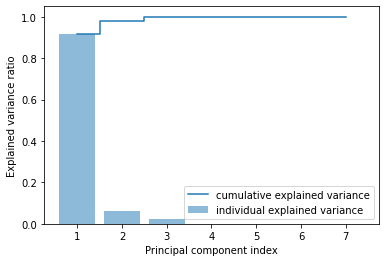

In [89]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(pca.explained_variance_)
print(tot)
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(len(var_exp))
# plot explained variances
plt.bar(range(1,8), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,8), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

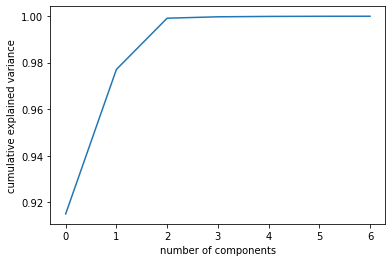

In [90]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Meter B
Contains 92 instances of diagnostic parameters for a 4-path liquid USM. It has 52 attributes (features) and 3 classes: \
(1) -- Profile factor \
(2) -- Symmetry \
(3) -- Crossflow \
(4) -- Swirl angle \
(5)-(8) -- Flow velocity in each of the four paths \
(9) -- Average flow velocity in all four paths \
(10)-(13) -- Speed of sound in each of the four paths \
(14) -- Average speed of sound in all four paths \
(15)-(22) -- Signal strength at both ends of each of the four paths \
(23)-(26) -- Turbulence in each of the four paths \
(27) -- Meter performance \
(28)-(35) -- Signal quality at both ends of each of the four paths \
(36)-(43) -- Gain at both ends of each of the four paths \
(44)-51 -- Transit time at both ends of each of the four paths \
(52) -- Class attribute or health state of meter: 1,2,3 \

In [91]:
meter_b_df = pd.read_csv("./dataset/Meter B", sep="\t", header=None)
meter_b_df.columns = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Swirl Angle',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Average flow velocity in all four paths',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Average Speed of Sound',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Turbulence 1',
    'Turbulence 2',
    'Turbulence 3',
    'Turbulence 4',
    'Meter Performance',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class attribute/Health State'
]
meter_b_df

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,9.038944,4.426833,4.504556,9.241222,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,9.030167,4.284000,4.597500,9.166444,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,9.780722,4.612000,4.544778,10.231167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,9.749389,4.835333,4.749278,10.945056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,9.602333,4.479889,4.716833,9.984056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2.418111,0.000000,0.000000,0.0000,5.332300,6.662456,6.288444,0.000000,5.922272,1550.598167,1514.837722,1516.918111,0.000000,1527.452111,126.551166,188.576672,1547.186278,2372.372333,609.580089

In [92]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
signal = meter_b_df.loc[: , 'Signal Strength 1':'Signal Strength 8']
signalQuality = meter_b_df.loc[: , 'Signal Quality 1':'Signal Quality 8']
Turbulence = meter_b_df.loc[: , 'Turbulence 1':'Turbulence 4']
gain = meter_b_df.loc[: , 'Gain at both ends 1':'Gain at both ends 8']
time = meter_b_df.loc[: , 'Transit Time 1':'Transit Time 8']
meter_b_df['Average Signal Strength'] = signal.mean(axis=1)
meter_b_df['Average signal Quality'] = signalQuality.mean(axis=1)
meter_b_df['Average Turbulence'] = Turbulence.mean(axis=1)
meter_b_df['Average Gain at both ends'] = gain.mean(axis=1)
meter_b_df['Average Transit Time'] = time.mean(axis=1)

meter_b_df


,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State,Average Signal Strength,Average signal Quality,Average Turbulence,Average Gain at both ends,Average Transit Time
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,9.038944,4.426833,4.504556,9.241222,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1,4883.004861,100.000000,6.802889,51.475000,102.135383
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,9.030167,4.284000,4.597500,9.166444,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1,4880.964583,100.000000,6.769528,51.475000,102.143804
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,9.780722,4.612000,4.544778,10.231167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1,4859.806944,100.000000,7.292167,51.475000,102.141860
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,9.749389,4.835333,4.749278,10.945056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1,4857.486806,100.000000,7.569764,51.475000,102.137063
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,9.602333,4.479889,4.716833,9.984056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1,4855.343056,100.000000,7.195778,51.475000,102.139019
...,...,...,...,...,...,...,.

In [93]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
column_names = [  'Profile Factor',
                    'Symmetry',
                    'Crossflow',
                    'Swirl Angle',
                    'Flow Velocity 1',
                    'Flow Velocity 2',
                    'Flow Velocity 3',
                    'Flow Velocity 4',
                    'Average flow velocity in all four paths',
                    'Speed of Sound 1',
                    'Speed of Sound 2',
                    'Speed of Sound 3',
                    'Speed of Sound 4',
                    'Average Speed of Sound',
                    'Signal Strength 1',
                    'Signal Strength 2',
                    'Signal Strength 3',
                    'Signal Strength 4',
                    'Signal Strength 5',
                    'Signal Strength 6',
                    'Signal Strength 7',
                    'Signal Strength 8',
                    'Average Signal Strength',
                    'Turbulence 1',
                    'Turbulence 2',
                    'Turbulence 3',
                    'Turbulence 4',
                    'Average Turbulence',
                    'Meter Performance',
                    'Signal Quality 1',
                    'Signal Quality 2',
                    'Signal Quality 3',
                    'Signal Quality 4',
                    'Signal Quality 5',
                    'Signal Quality 6',
                    'Signal Quality 7',
                    'Signal Quality 8',
                    'Average signal Quality',
                    'Gain at both ends 1',
                    'Gain at both ends 2',
                    'Gain at both ends 3',
                    'Gain at both ends 4',
                    'Gain at both ends 5',
                    'Gain at both ends 6',
                    'Gain at both ends 7',
                    'Gain at both ends 8',
                    'Average Gain at both ends',
                    'Transit Time 1',
                    'Transit Time 2',
                    'Transit Time 3',
                    'Transit Time 4',
                    'Transit Time 5',
                    'Transit Time 6',
                    'Transit Time 7',
                    'Transit Time 8',
                    'Average Transit Time',
                    'Class attribute/Health State']
meter_b_df = meter_b_df.reindex(columns=column_names)
meter_b_df

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Average Signal Strength,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Turbulence,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Average signal Quality,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Average Gain at both ends,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Average Transit Time,Class attribute/Health State
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,4883.004861,9.038944,4.426833,4.504556,9.241222,6.802889,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,102.135383,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,4880.964583,9.030167,4.284000,4.597500,9.166444,6.769528,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,102.143804,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,4859.806944,9.780722,4.612000,4.544778,10.231167,7.292167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,102.141860,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,4857.486806,9.749389,4.835333,4.749278,10.945056,7.569764,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,102.137063,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,4855.343056,9.602333,4.479889,4.716833,9.984056,7.195778,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,102.139019,1
...,...,...,...,...,...,...,.

In [94]:
#check for duplicate
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
dups = meter_b_df.duplicated()
dups


0     False
1     False
2     False
3     False
4     False
      ...  
87    False
88    False
89    False
90    False
91    False
Length: 92, dtype: bool

In [95]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
meter_b_df['Class attribute/Health State'] = meter_b_df['Class attribute/Health State'].replace([3],4)
meter_b_df

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Average Signal Strength,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Turbulence,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Average signal Quality,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Average Gain at both ends,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Average Transit Time,Class attribute/Health State
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,4883.004861,9.038944,4.426833,4.504556,9.241222,6.802889,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,102.135383,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,4880.964583,9.030167,4.284000,4.597500,9.166444,6.769528,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,102.143804,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,4859.806944,9.780722,4.612000,4.544778,10.231167,7.292167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,102.141860,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,4857.486806,9.749389,4.835333,4.749278,10.945056,7.569764,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,102.137063,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,4855.343056,9.602333,4.479889,4.716833,9.984056,7.195778,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,102.139019,1
...,...,...,...,...,...,...,.

In [96]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 13
pca = PCA(n_components=numComponents)
pca.fit(meter_b_df)
projected = pca.transform(meter_b_df)
projected_1 = pd.DataFrame(projected,columns=['Profile Factor',
                    'Symmetry',
                    'Crossflow',
                    'Swirl Angle',
                    'Average flow velocity in all four paths',
                    'Average Speed of Sound',
                    'Average Signal Strength',
                    'Average Turbulence',
                    'Meter Performance',
                    'Average signal Quality',
                    'Average Gain at both ends',
                    'Average Transit Time',
                    'Class attribute/Health State'],index=range(1,93))
projected_1

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Average flow velocity in all four paths,Average Speed of Sound,Average Signal Strength,Average Turbulence,Meter Performance,Average signal Quality,Average Gain at both ends,Average Transit Time,Class attribute/Health State
1,-4001.377310,1408.239997,691.317918,-483.689778,87.332313,170.568720,85.870249,-130.488414,-4.771447,34.399084,-20.984059,-0.740717,1.692151
2,-3996.169032,1404.038245,686.167595,-480.371420,87.829263,170.225277,86.826328,-130.228844,-4.221447,36.769189,-21.438554,-0.668159,1.877688
3,-3938.524842,1381.345775,693.618219,-476.513504,63.422970,141.761750,30.092684,-79.276372,-10.397803,20.323049,-16.452270,-1.701248,0.771541
4,-3931.984011,1378.539886,687.663237,-475.650184,61.936803,139.150746,27.957527,-78.256678,-5.652097,23.523172,-12.543048,-1.184162,0.916200
5,-3925.388348,1380.037431,689.059946,-473.565978,62.642882,139.041530,28.315671,-77.942310,-6.507723,23.813178,-14.160294,-1.279020,1.332746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,8531.857955,-1002.428770,-112.357988,-823.852303,19.436494,10.403181,23.846974,-85.237111,65.985349,-108.254379,-6.995783,3.122961,4.252831
89,8501.686923,-1006.887169,-132.148798,-825.007820,-1.742129,6.808772,30.561127,-70.228140,53.340276,-60.765894,-11.959708,0.790966,3.971457
90,8419.789306,-1022.096057,-206.621704,-863.823369,1.510080,8.904619,35.149606,-86.969972,66.853262,-123.712752,-5.767715,3.469627,4.423711
91,8373.679990,-1016.177308,-259.835629,-818.977645,42.038078,27.109075,24.446973,-96.422014,62.124499,-172.104021,-3.142446,4.282947,0.419419


### Meter D
Contains 180 instances of diagnostic parameters for a 4-path liquid USM. It has 44 attributes(features) and 4 classes: \
(1) -- Profile factor \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(7) -- Flow velocity in each of the four paths \
(8)-(11) -- Speed of sound in each of the four paths \
(12)-(19) -- Signal strength at both ends of each of the four paths \
(20)-(27) -- Signal quality at both ends of each of the four paths \
(28)-(35) -- Gain at both ends of each of the four paths \
(36)-(43) -- Transit time at both ends of each of the four paths \
(44) -- Class attribute or health state of meter: 1,2,3,4 \

In [97]:
meter_d_df = pd.read_csv("./dataset/Meter D", sep="\t", header=None)
meter_d_df.columns = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class attribute/Health State'
]
meter_d_df


,Profile Factor,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,1485.780556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3543.972222,3457.944444,3367.583333,3401.805556,3711.222222,3707.138889,3643.555556,3590.777778,0.5,0.5,0.2,0.2,1.4,1.4,-0.700000,-0.700000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,1486.130556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3546.805556,3412.583333,3256.666667,3322.277778,3716.055556,3670.777778,3622.222222,3580.305556,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,1486.297222,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3557.277778,3413.333333,3267.000000,3330.722222,3693.666667,3677.583333,3620.027778,3574.083333,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,1486.416667,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3541.111111,3433.666667,3262.000000,3329.611111,3702.055556,3677.194444,3635.027778,3579.694444,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,1486.555556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3541.333333,3416.888889,3273.472222,3320.833333,3690.138889,3690.500000,3615.833333,3564.972222,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,1567.686111,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1556.694444,1555.250000,1781.333333,1886.944444,1968.166667,1943.805556,1771.861111,1724.166667,45.9,45.9,44.2,44.2,44.8,44.8,44.600000,44.600000,121.266111,122.244167,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,4
176,0.173768,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,1555.538889,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1569.472222,1627.333333,1788.111111,1969.111111,1953.583333,1929.722222,1723.361111,1711.361111,45.9,45.9,44.2,44.2,44.8,44.8,44.600000,44.600000,121.082222,121.059167,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,4
177,0.049027,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,1518.072222,1439.802778,1512.719444,1554.647222,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1605.111111,1723.361111,1760.444444,2026.527778,2007.722222,1993.944444,1627.805556,1641.333333,45.9,45.9,44.2,44.2,44.8,44.8,44.169444,44.169444,121.298889,121.370278,158.391111,154.248611,149.020000

In [98]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
velocity = meter_d_df.loc[: , 'Flow Velocity 1':'Flow Velocity 4']
soundspeed = meter_d_df.loc[: , 'Speed of Sound 1':'Speed of Sound 4']
signal = meter_d_df.loc[: , 'Signal Strength 1':'Signal Strength 8']
signalQuality = meter_d_df.loc[: , 'Signal Quality 1':'Signal Quality 8']
gain = meter_d_df.loc[: , 'Gain at both ends 1':'Gain at both ends 8']
time = meter_d_df.loc[: , 'Transit Time 1':'Transit Time 8']
meter_d_df['Average Velocity'] = velocity.mean(axis=1)
meter_d_df['Average Speed of Sound'] = soundspeed.mean(axis=1)
meter_d_df['Average Signal Strength'] = signal.mean(axis=1)
meter_d_df['Average signal Quality'] = signalQuality.mean(axis=1)
meter_d_df['Average Gain at both ends'] = gain.mean(axis=1)
meter_d_df['Average Transit Time'] = time.mean(axis=1)

meter_d_df

,Profile Factor,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State,Average Velocity,Average Speed of Sound,Average Signal Strength,Average signal Quality,Average Gain at both ends,Average Transit Time
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,1485.780556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3543.972222,3457.944444,3367.583333,3401.805556,3711.222222,3707.138889,3643.555556,3590.777778,0.5,0.5,0.2,0.2,1.4,1.4,-0.700000,-0.700000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1,2.469375,1485.864583,65.75,3553.000000,0.350000,137.750590
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,1486.130556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3546.805556,3412.583333,3256.666667,3322.277778,3716.055556,3670.777778,3622.222222,3580.305556,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1,3.559236,1486.225000,65.75,3515.961806,0.300000,137.717604
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,1486.297222,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3557.277778,3413.333333,3267.000000,3330.722222,3693.666667,3677.583333,3620.027778,3574.083333,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1,3.565625,1486.381944,65.75,3516.711806,0.300000,137.703299
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,1486.416667,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3541.111111,3433.666667,3262.000000,3329.611111,3702.055556,3677.194444,3635.027778,3579.694444,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1,3.539028,1486.507639,65.75,3520.045139,0.300000,137.690903
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,1486.555556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3541.333333,3416.888889,3273.472222,3320.833333,3690.138889,3690.500000,3615.833333,3564.972222,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1,3.533750,1486.652778,65.75,3514.246528,0.300000,137.677569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,1567.686111,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1556.694444,1555.250000,1781.333333,1886.944444,1968.166667,1943.805556,1771.861111,1724.166667,45.9,45.9,44.2,44.2,44.8,44.8,44.600000,44.600000,121.266111,122.244167,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,4,-0.550000,1520.656944,55.00,1773.527778,44.875000,135.083819
176,0.173768,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,1555.538889,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1569.472222,1627.333333,1788.111111,1969.111111,1953.583333,1929.722222,1723.3611

In [99]:
column_names = [
            'Profile Factor',
            'Symmetry',
            'Crossflow',
            'Flow Velocity 1',
            'Flow Velocity 2',
            'Flow Velocity 3',
            'Flow Velocity 4',
            'Average Velocity',
            'Speed of Sound 1',
            'Speed of Sound 2',
            'Speed of Sound 3',
            'Speed of Sound 4',
            'Average Speed of Sound',
            'Signal Strength 1',
            'Signal Strength 2',
            'Signal Strength 3',
            'Signal Strength 4',
            'Signal Strength 5',
            'Signal Strength 6',
            'Signal Strength 7',
            'Signal Strength 8',
            'Average Signal Strength',
            'Signal Quality 1',
            'Signal Quality 2',
            'Signal Quality 3',
            'Signal Quality 4',
            'Signal Quality 5',
            'Signal Quality 6',
            'Signal Quality 7',
            'Signal Quality 8',
            'Average signal Quality',
            'Gain at both ends 1',
            'Gain at both ends 2',
            'Gain at both ends 3',
            'Gain at both ends 4',
            'Gain at both ends 5',
            'Gain at both ends 6',
            'Gain at both ends 7',
            'Gain at both ends 8',
            'Average Gain at both ends',
            'Transit Time 1',
            'Transit Time 2',
            'Transit Time 3',
            'Transit Time 4',
            'Transit Time 5',
            'Transit Time 6',
            'Transit Time 7',
            'Transit Time 8',
            'Average Transit Time',
            'Class attribute/Health State'
]
meter_d_df = meter_d_df.reindex(columns=column_names)
meter_d_df

,Profile Factor,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average Velocity,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Average Signal Strength,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Average signal Quality,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Average Gain at both ends,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Average Transit Time,Class attribute/Health State
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,2.469375,1485.805556,1485.930556,1485.941667,1485.780556,1485.864583,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3543.972222,3457.944444,3367.583333,3401.805556,3711.222222,3707.138889,3643.555556,3590.777778,3553.000000,0.5,0.5,0.2,0.2,1.4,1.4,-0.700000,-0.700000,0.350000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,137.750590,1
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,3.559236,1486.163889,1486.302778,1486.302778,1486.130556,1486.225000,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3546.805556,3412.583333,3256.666667,3322.277778,3716.055556,3670.777778,3622.222222,3580.305556,3515.961806,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,0.300000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,137.717604,1
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,3.565625,1486.322222,1486.452778,1486.455556,1486.297222,1486.381944,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3557.277778,3413.333333,3267.000000,3330.722222,3693.666667,3677.583333,3620.027778,3574.083333,3516.711806,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,0.300000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,137.703299,1
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,3.539028,1486.455556,1486.575000,1486.583333,1486.416667,1486.507639,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3541.111111,3433.666667,3262.000000,3329.611111,3702.055556,3677.194444,3635.027778,3579.694444,3520.045139,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,0.300000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,137.690903,1
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,3.533750,1486.600000,1486.725000,1486.730556,1486.555556,1486.652778,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3541.333333,3416.888889,3273.472222,3320.833333,3690.138889,3690.500000,3615.833333,3564.972222,3514.246528,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,0.300000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,137.677569,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,-0.550000,1513.505556,1507.080556,1494.355556,1567.686111,1520.656944,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.00,1556.694444,1555.250000,1781.333333,1886.944444,1968.166667,1943.805556,1771.861111,1724.166667,1773.527778,45.9,45.9,44.2,44.2,44.8,44.8,44.600000,44.600000,44.875000,121.266111,122.244167,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,135.083819,4
176,0.173768,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,-0.853264,1521.897222,1474.400000,1500.705556,1555.538889,1513.135417,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.00,1569.472222,1627.333333,1788.111111,1969.111111,1953.

In [100]:
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 90)
dups = meter_d_df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [101]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 10
pca = PCA(n_components=numComponents)
pca.fit(meter_b_df)
projected = pca.transform(meter_b_df)
projected_1 = pd.DataFrame(projected,columns=[
            'Profile Factor',
            'Symmetry',
            'Crossflow',
            'Average Velocity',
            'Average Speed of Sound',
            'Average Signal Strength',
            'Average signal Quality',
            'Average Gain at both ends',
            'Average Transit Time',
            'Class attribute/Health State'],index=range(1,93))
projected_1

,Profile Factor,Symmetry,Crossflow,Average Velocity,Average Speed of Sound,Average Signal Strength,Average signal Quality,Average Gain at both ends,Average Transit Time,Class attribute/Health State
1,-4001.377310,1408.239997,691.317918,-483.689778,87.332313,170.568720,85.870249,-130.488414,-4.771447,34.399084
2,-3996.169032,1404.038245,686.167595,-480.371420,87.829263,170.225277,86.826328,-130.228844,-4.221447,36.769189
3,-3938.524842,1381.345775,693.618219,-476.513504,63.422970,141.761750,30.092684,-79.276372,-10.397803,20.323049
4,-3931.984011,1378.539886,687.663237,-475.650184,61.936803,139.150746,27.957527,-78.256678,-5.652097,23.523172
5,-3925.388348,1380.037431,689.059946,-473.565978,62.642882,139.041530,28.315671,-77.942310,-6.507723,23.813178
...,...,...,...,...,...,...,...,...,...,...
88,8531.857955,-1002.428770,-112.357988,-823.852303,19.436494,10.403181,23.846974,-85.237111,65.985349,-108.254379
89,8501.686923,-1006.887169,-132.148798,-825.007820,-1.742129,6.808772,30.561127,-70.228140,53.340276,-60.765894
90,8419.789306,-1022.096057,-206.621704,-863.823369,1.510080,8.904619,35.149606,-86.969972,66.853262,-123.712752
91,8373.679990,-1016.177308,-259.835629,-818.977645,42.038078,27.109075,24.446973,-96.422014,62.124499,-172.104021
